# Sharpe Ratio & Frontier

In [1]:
import pandas_datareader.data as web
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

%matplotlib inline

ds_yahoo = 'yahoo'

last_year = datetime.datetime.now().year - 1
start = datetime.datetime.now().replace(year=last_year)
end = datetime.datetime.now()

## Portfolio Atual

### Pegando os dados na API do Yahoo

In [2]:
tickers = ['ITUB4.SA', 'ABEV3.SA', 'USIM5.SA', 'PMAM3.SA',
           'FLRY3.SA', 'PSSA3.SA', 'TIET4.SA', 'LEVE3.SA', 'WHRL3.SA']

itau = web.DataReader(tickers[0], ds_yahoo, start, end)
abev = web.DataReader(tickers[1], ds_yahoo, start, end)
usim = web.DataReader(tickers[2], ds_yahoo, start, end)
pmam = web.DataReader(tickers[3], ds_yahoo, start, end)
flry = web.DataReader(tickers[4], ds_yahoo, start, end)
pssa = web.DataReader(tickers[5], ds_yahoo, start, end)
tiet = web.DataReader(tickers[6], ds_yahoo, start, end)
leve = web.DataReader(tickers[7], ds_yahoo, start, end)
whrl = web.DataReader(tickers[8], ds_yahoo, start, end)

## Normalizando o retorno diário de cada ativo do portfólio

In [4]:
for acao_df in (itau, abev, usim, pmam, flry, pssa, tiet, leve, whrl):
    acao_df['Retorno Normalizado'] = acao_df['Adj Close'] / acao_df.iloc[0]['Adj Close']

## Alocando cada ativo com um peso específico

In [5]:
pesos = [0.13700082, 0.03760006, 0.0256183,  0.00517798, 0.03812574, 0.24599906, 0.32096756, 0.05552042, 0.13399005]
# pesos = [.0964, .0252, .1161, .2293, .0491, .0864, .1373, .2415, .0187]

for acao_df, alocacao in zip((itau, abev, usim, pmam, flry, pssa, tiet, leve, whrl), pesos):
    acao_df['Alocacao'] = acao_df['Retorno Normalizado'] * alocacao

## Posição de cada ativo no portfólio

In [6]:
for acao_df in (itau, abev, usim, pmam, flry, pssa, tiet, leve, whrl):
    acao_df['Posicao'] = acao_df['Alocacao'] * 10000

In [7]:
todas_posicoes = [itau['Posicao'], abev['Posicao'], usim['Posicao'],
                  pmam['Posicao'], flry['Posicao'], pssa['Posicao'],
                  tiet['Posicao'], leve['Posicao'], whrl['Posicao']]

# DF que terá colunas adicionadas como Total e Retorno Diário
portfolio_posicao = pd.concat(todas_posicoes, axis=1)

# DF que terá apenas as ações com o Adj Close column
portfolio_acoes = pd.concat(todas_posicoes, axis=1)b

In [8]:
portfolio_posicao.columns = ['ITUB', 'ABEV', 'USIM', 'PMAM', 'FLRY', 'PSSA', 'TIET', 'LEVE', 'WHRL']
portfolio_acoes.columns = ['ITUB', 'ABEV', 'USIM', 'PMAM', 'FLRY', 'PSSA', 'TIET', 'LEVE', 'WHRL']

## Desempenho da carteira

In [24]:
portfolio_posicao.head()

,ITUB,ABEV,USIM,PMAM,FLRY,PSSA,TIET,LEVE,WHRL,Total,Retorno Diario
Date,,,,,,,,,,,
2018-08-01,1370.008200,376.000600,256.183000,51.779800,381.257400,2459.990600,3209.675600,555.204200,1339.900500,9999.999900,NaN
2018-08-02,1374.817675,372.907524,261.137653,50.937852,389.729809,2435.380868,3225.409017,562.108286,1342.409715,10014.838398,0.001484
2018-08-03,1407.603099,373.100832,263.760684,51.779800,397.213739,2491.632039,3209.675600,552.902798,1304.772028,10052.440620,0.003755
2018-08-06,1397.375360,373.100832,257.348782,50.516877,397.496146,2531.309300,3209.675600,556.163097,1342.409715,10115.395709,0.006263
2018-08-07,1388.956694,370.587717,254.434312,50.095903,384.081546,2616.188527,3225.409017,553.286405,1329.863775,10172.903897,0.005685


In [9]:
portfolio_posicao['Total'] = portfolio_posicao.sum(axis=1)

In [10]:
print('Investimento inicial:')
print(portfolio_posicao['Total'][0])
print('Investimento final:')
print(round(portfolio_posicao['Total'][-1], 2))

Investimento inicial:
9999.999899999999
Investimento final:
11604.87


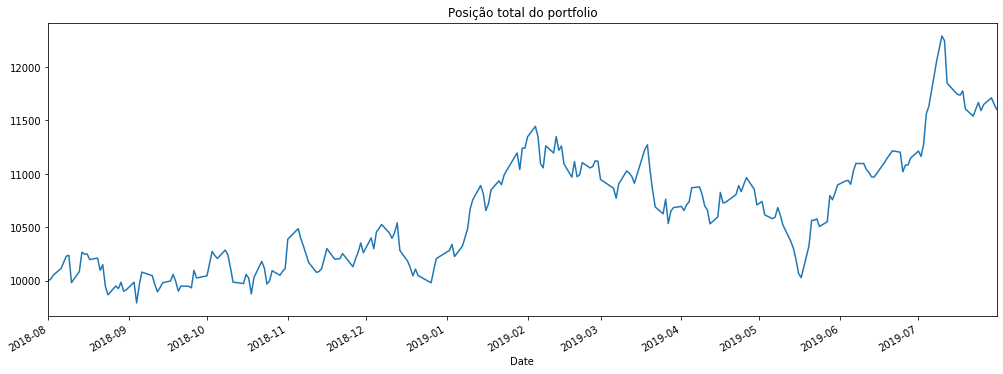

In [11]:
portfolio_posicao['Total'].plot(figsize=(17,6))
plt.title('Posição total do portfolio');

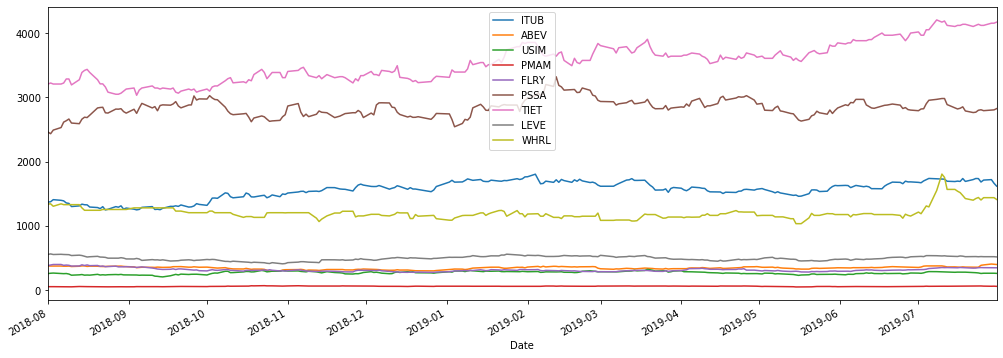

In [12]:
portfolio_acoes.plot(figsize=(17,6));

## Desempenho da Carteira Normalizada

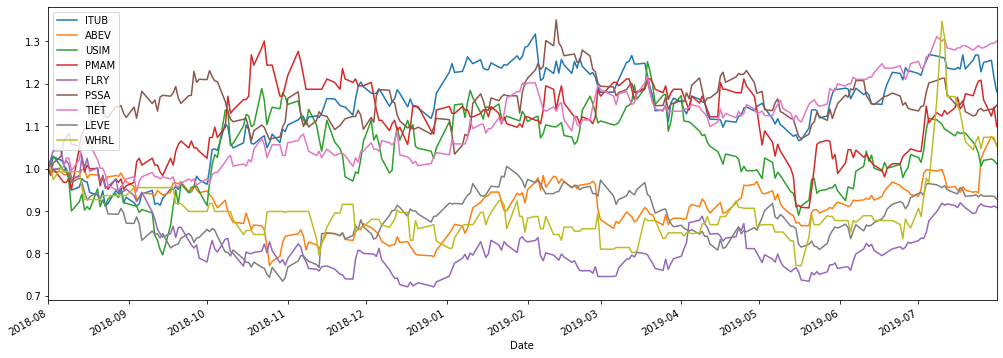

In [13]:
portfolio_normalizado = portfolio_acoes / portfolio_acoes.iloc[0]
portfolio_normalizado.plot(figsize=(17,6));

## Retorno diário da carteira

In [14]:
portfolio_posicao['Retorno Diario'] = portfolio_posicao['Total'].pct_change(1)

In [15]:
# Média de retorno diário
round_ret_medio_diario = round(portfolio_posicao['Retorno Diario'].mean() * 100, 2)
print('Essa carteira rende em média {}% diariamente'.format(round_ret_medio_diario))

Essa carteira rende em média 0.07% diariamente


In [16]:
# Desvio Padrão do retorno diário
portfolio_posicao['Retorno Diario'].std()

0.010344823709347152

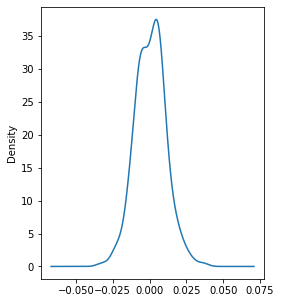

In [17]:
# Gráfico de densidade
portfolio_posicao['Retorno Diario'].plot(kind='kde', figsize=(4,5));

## Retorno Total da Carteira

In [18]:
retorno_total_acumulado = 100 * (portfolio_posicao['Total'][-1] / portfolio_posicao['Total'][0] - 1)
round_ret = round(retorno_total_acumulado, 3)
print('Essa carteira rendeu {}%'.format(round_ret))

Essa carteira rendeu 16.049%


In [19]:
sharpe_ratio = (portfolio_posicao['Retorno Diario'].mean()) / portfolio_posicao['Retorno Diario'].std()
sharpe_ratio

0.06412983385239676

In [20]:
sharpe_ratio_ano = (len(itau) ** 0.5) * sharpe_ratio
sharpe_ratio_ano

1.0037906751580847

## Retorno diário

In [21]:
retorno_diario = portfolio_acoes.pct_change(1)

## Gerando um único portfólio com posição atual

In [22]:
print(portfolio_acoes.columns)

# Gerando pesos aleatórios
print("Pesos Atuais")
print(pesos)
print("")

# Rebalanceando os pesos
print("Rebalancear os pesos")
pesos = pesos / np.sum(pesos)
print(pesos)
print("")

# Retorno esperado
print("Retorno esperado")
ret_esp = np.sum( (retorno_diario.mean() * pesos) * len(itau) )
print(ret_esp)
print("")

# Volatilidade esperada
print("Volatilidade esperada")
vol_esp = np.sqrt( np.dot( pesos.T, np.dot( retorno_diario.cov() * len(itau), pesos ) ) )
print(vol_esp)
print("")

# Taxa de Sharpe
print("Sharpe Ratio")
sharpe = (ret_esp - 0.065) / vol_esp
print(sharpe)


Index(['ITUB', 'ABEV', 'USIM', 'PMAM', 'FLRY', 'PSSA', 'TIET', 'LEVE', 'WHRL'], dtype='object')
Pesos Atuais
[0.13700082, 0.03760006, 0.0256183, 0.00517798, 0.03812574, 0.24599906, 0.32096756, 0.05552042, 0.13399005]

Rebalancear os pesos
[0.13700082 0.03760006 0.0256183  0.00517798 0.03812574 0.24599906
 0.32096756 0.05552042 0.13399005]

Retorno esperado
0.18940410559355178

Volatilidade esperada
0.161794342963775

Sharpe Ratio
0.7689026903827241


## Gerando milhares de portfólios

In [23]:
num_portfolios = 1
pesos_arr = np.zeros((num_portfolios, len(portfolio_acoes.columns)))
ret_esp_arr = np.zeros(num_portfolios)
vol_esp_arr = np.zeros(num_portfolios)
sharpe_arr = np.zeros(num_portfolios)

for ind in range(num_portfolios):

    # Pesos aleatórios
    pesos = np.array(np.random.random(len(tickers)))
    pesos = pesos / np.sum(pesos)
    pesos_arr[ind,:] = pesos

    # Retorno esperado
    ret_esp_arr[ind] = np.sum( (retorno_diario.mean() * pesos) * len(itau) )

    # Volatilidade esperada
    vol_esp_arr[ind] = np.sqrt( np.dot( pesos.T, np.dot( retorno_diario.cov() * len(itau), pesos ) ) )

    # Taxa de Sharpe
    sharpe_arr[ind] = (ret_esp_arr[ind] - 0.065) / vol_esp_arr[ind]

print(portfolio_acoes.columns)
print("")
print(pesos_arr[sharpe_arr.argmax(),:])

Index(['ITUB', 'ABEV', 'USIM', 'PMAM', 'FLRY', 'PSSA', 'TIET', 'LEVE', 'WHRL'], dtype='object')

[0.0872162  0.04390079 0.19377254 0.1464551  0.14174132 0.02915058
 0.11388046 0.03587035 0.20801268]

O maior Sharpe Ratio foi:  0.31829582108400356


In [ ]:
sharpe_arr.max()

In [ ]:
sharpe_arr.argmax()

In [ ]:
pesos_arr[sharpe_arr.argmax(),:]